In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import Image, display_html, display, Math, HTML

# Confidence

In this lecture we'll use what we've learned so far to start to build reliable, defensible conclusions about data.

When working with data that is a sample of some population, it is always possible to compute statistics like the sample mean.

However, as data scientists, the crucial question to ask is: "How __confident__ should I be that the sample mean represents the population?"

In other words, just because I can compute a sample mean, does it really tell me anything?

Let's make this question more precise.  

Today we will exclusively focus on estimating the true mean of a population, given a sample.

So, to start, let's say we have obtained a sample $X_i, i = 1,\dots, n$.

And we can compute the sample mean

$$ M = \frac{1}{n}\sum_{i=1}^n X_i $$

So a more precise question would be: __"How close is $M$ to the population mean $\mu$?"__

Now, even this question is not really precise enough.   Remember that $M$ is a random variable.   

So the question "How close is $M$ to the population mean $\mu$?" does not have a definite answer.

We can only answer this question __probabilistically.__

The way we phrase this is as follows.

We fix an interval around $M$, say $(M - f, M + f)$.   Then we ask:

__What is the probability that $\mu$ lies within the interval $(M - f, M + f)$?__

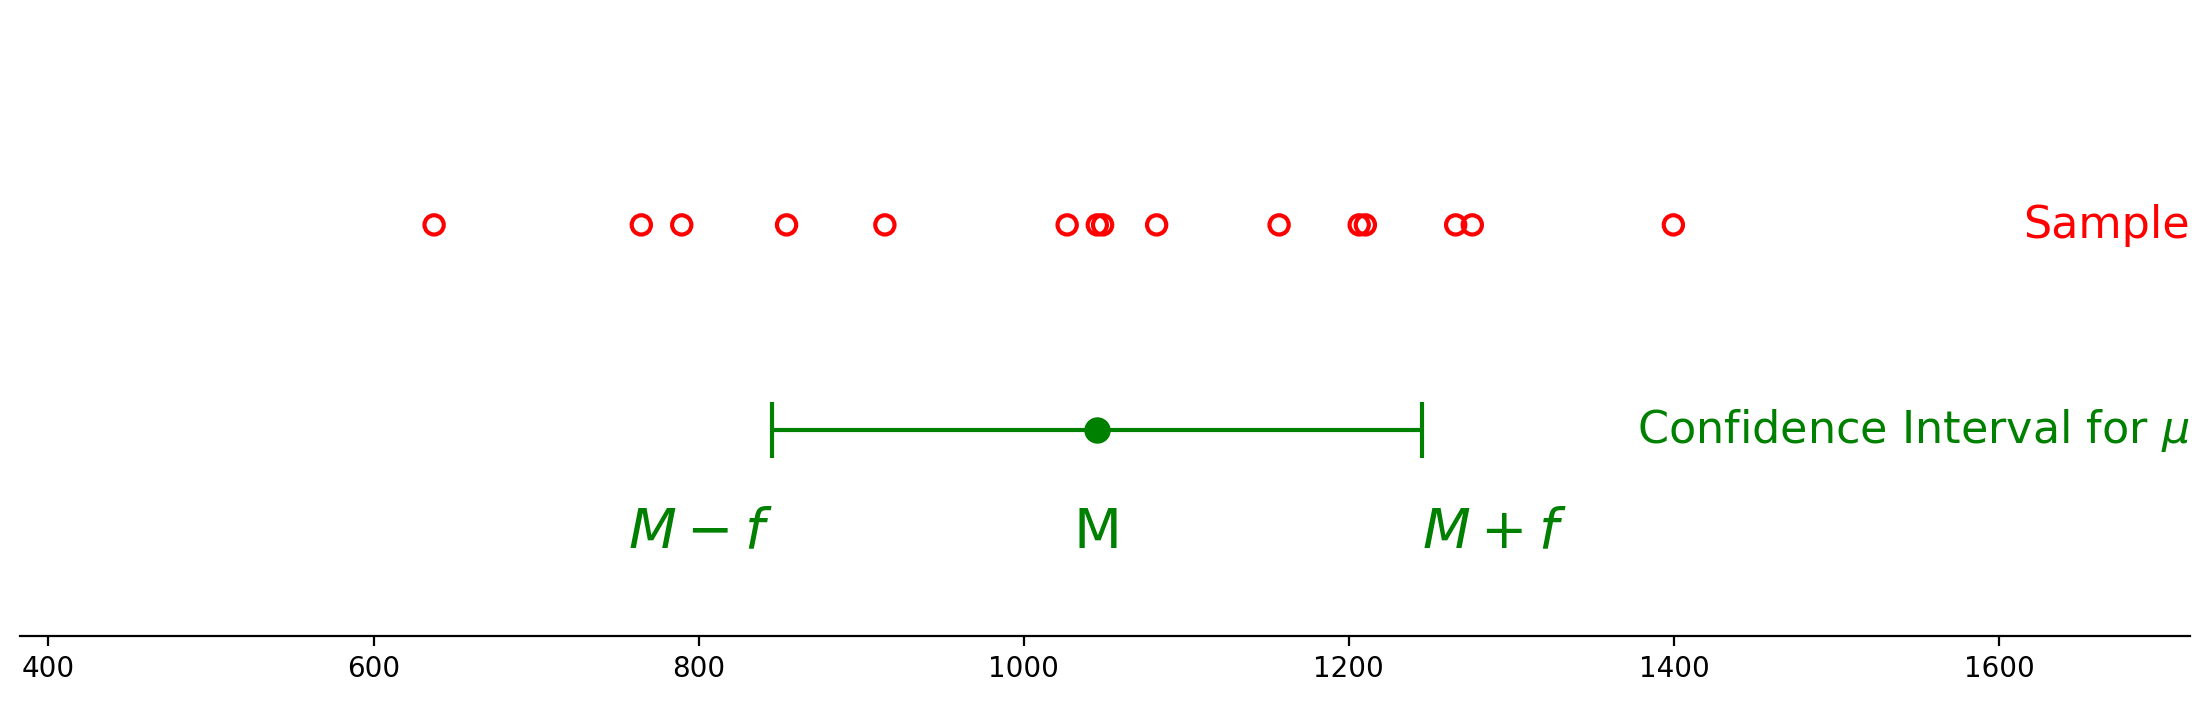

In [2]:
from scipy.stats import norm
from scipy.stats import uniform
from numpy.random import default_rng

rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
samp_size = 15
#
# gaussian curve
fig, ax1 = plt.subplots(1, 1, figsize = (14,4), gridspec_kw={'height_ratios': [1]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), 
                norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[0], x[-1])
# ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
#
# points under the curve
# use sample pop_x and pop_y as above
# ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
# ax1.yaxis.set_major_locator(plt.NullLocator())
# ax1.set_ylabel('Density', size = 16)
# ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
# ax1.set_xlim(xmin, xmax)
# xmin, xmax = ax1.get_xlim()
#
# sample
# 
samp_x = norm.rvs(size = samp_size, loc = mu, scale = sig, random_state = rng)
samp_y = [2.5 for x in samp_x]
M = np.mean(samp_x)
f = 200
#
ax1.scatter(samp_x, samp_y, marker = 'o', facecolors='none', 
            edgecolors='red', linewidths = 1.5, s = 48)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(1.5, 3)
#
# ax1.set_title(f'SAT Scores 2022,  $\mu = {mu}, \sigma = {sig}$', size=14)
# 
# sample plot
# turn off y axis entirely
ax1.yaxis.set_visible(False)
# remove the "box" around the plot
spines = list(ax1.spines.values())
for spine in [spines[i] for i in [0, 1, 3]]:
    spine.set_visible(False)
ax1.text(xmax, 2.5, 'Sample', size = 16, color = 'red', va = 'center', ha = 'right')
#
#
ax1.scatter(M, 2, marker = 'o', facecolors = 'g', 
            edgecolors='g', linewidths = 1.5, s = 64)
ax1.errorbar(M, 2, xerr = f, fmt = 'None', ecolor = 'g', 
             elinewidth = 1.5, capsize = 10, capthick = 1.5)
ax1.text(xmax, 2, 'Confidence Interval for $\mu$', size = 16, 
         color = 'g', va = 'center', ha = 'right')
#
ax1.text(M, 1.75, 'M', size = 20, color = 'g', ha = 'center', va = 'center')
ax1.text(M+f, 1.75, r'$M + f$', size = 20, color = 'g', ha = 'left', va = 'center')
ax1.text(M-f, 1.75, r'$M - f$', size = 20, color = 'g', ha = 'right', va = 'center');
# ax3a.text(M, ax3a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'center')
# ax3a.text(M+(sig/np.sqrt(samp_size)), ax3a.get_ylim()[1], 
#'^', size = 20, color = 'g', ha = 'center')

# ax1.set_title('SAT Scores', size=18);

In other words, we are asking:

What is $P(M - f \leq \mu \leq M + f)$?

Before we reason more about how to calculate this probabilty , let's just quickly write down what it's going to tell us:

Let's assume that we can compute this probability for any given $f$. (We will soon see how to do that.)   Then we want to choose an $f$ so that this probability is high enough that we are "confident" that the interval contains the population mean.

A good level of confidence is 95\%.   So our final question is:
    
__What is $f$, so that $P(M - f \leq \mu \leq M + f) \geq 0.95$?__

When we find that $f$ -- let's call it $f_{95}$ -- we can then construct the interval $(M - f_{95}, M + f_{95})$.

This can also be written as $M \pm f_{95}.$

This will be __the 95\% confidence interval__ for $\mu$.

## The Insight

OK, we have turned the abstract question of

"How confident are we that $M$ is close to $\mu$?"

into the concrete question

"What is $P(M - f \leq \mu \leq M + f)$?"

At first glance, this seems like a hard probability to compute.   Keep in mind that $\mu$ is some unknown, but fixed value.  On the other hand, $M$ is a random variable that depends on the sample that we took.

However, there is a clever insight that will get us on the right path.

Notice that when we ask the question: 

"What is $P(M - f \leq \mu \leq M + f)$?", 

another way of saying this is 

"What is the probability that the distance between $\mu$ and $M$ is less than $f$?"

In other words, "What is $P(|M - \mu| < f)$?".

Now notice that this is the same thing as $P(\mu - f \leq M \leq \mu + f)$.

In other words: if the distance between $M$ and $\mu$ is less than $f$, then $M$ lies between $\mu - f$ and $\mu + f$.

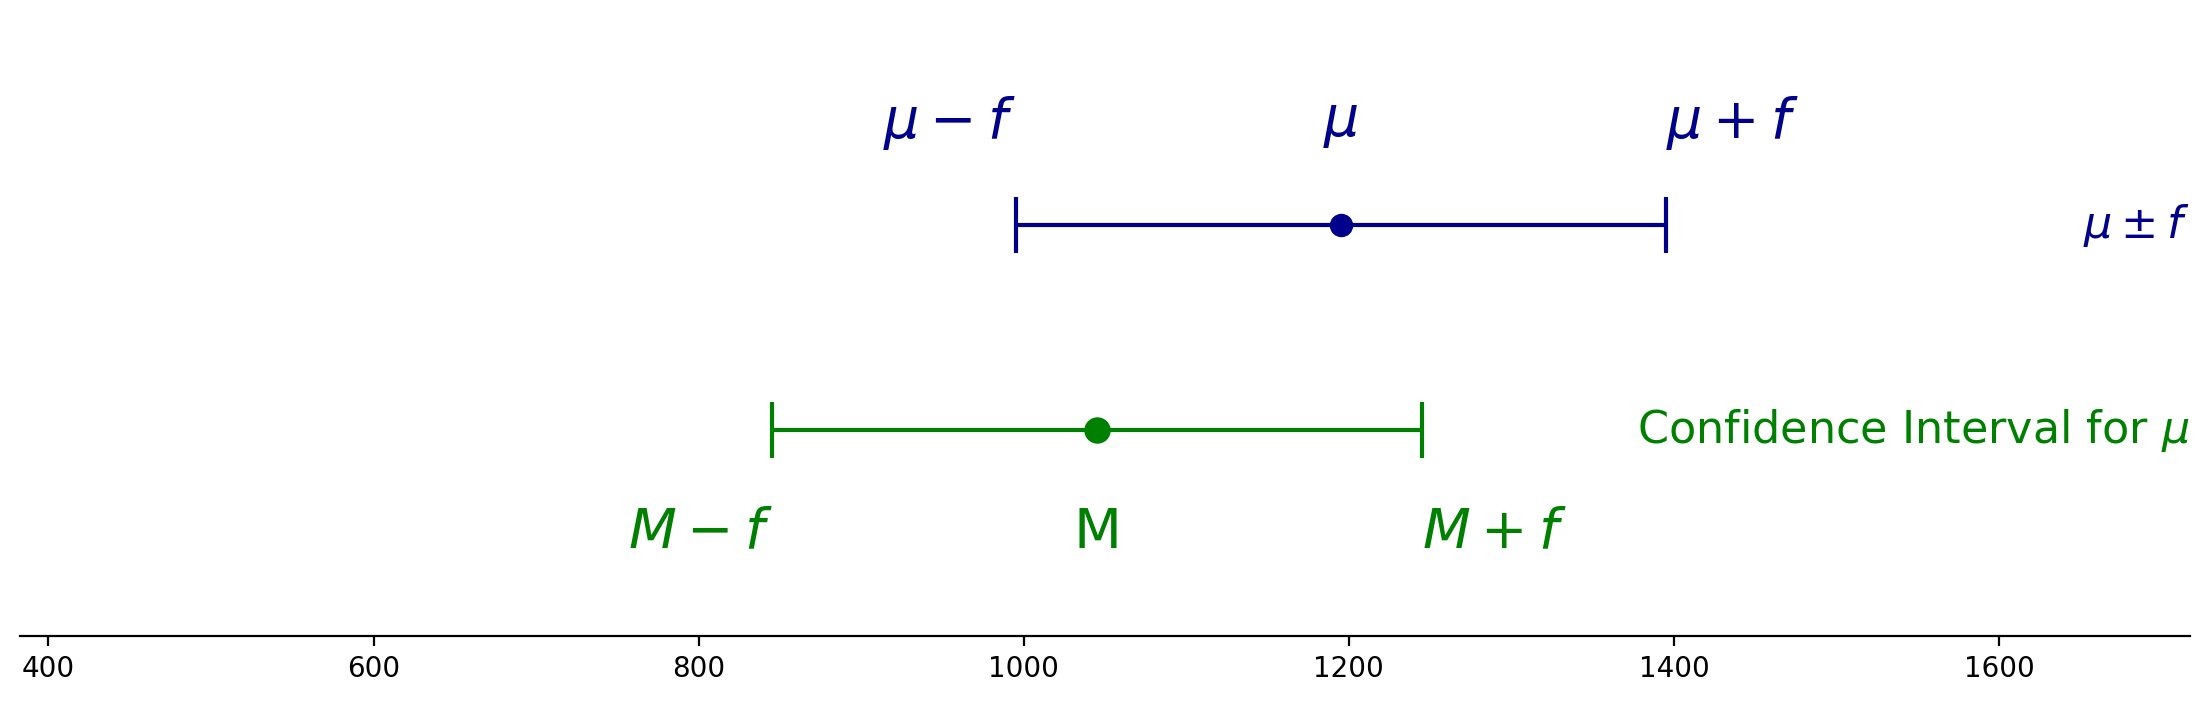

In [3]:
from scipy.stats import norm
from scipy.stats import uniform
from numpy.random import default_rng

rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
samp_size = 15
#
# gaussian curve
fig, ax1 = plt.subplots(1, 1, figsize = (14,4), gridspec_kw={'height_ratios': [1]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), 
                norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[0], x[-1])
# ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
#
# points under the curve
# use sample pop_x and pop_y as above
# ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
# ax1.yaxis.set_major_locator(plt.NullLocator())
# ax1.set_ylabel('Density', size = 16)
# ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
# ax1.set_xlim(xmin, xmax)
# xmin, xmax = ax1.get_xlim()
#
# sample
# 
samp_x = norm.rvs(size = samp_size, loc = mu, 
                  scale = sig, random_state = rng)
samp_y = [2.5 for x in samp_x]
M = np.mean(samp_x)
f = 200
mu = M + 150
#
ax1.scatter(mu, 2.5, marker = 'o', facecolors='darkblue', 
            edgecolors='darkblue', linewidths = 1.5, s = 48)
ax1.errorbar(mu, 2.5, xerr = f, fmt = 'None', ecolor = 'darkblue', 
             elinewidth = 1.5, capsize = 10, capthick = 1.5)
ax1.text(mu, 2.75, '$\mu$', size = 20, color = 'darkblue', ha = 'center', va = 'center')
ax1.text(mu+f, 2.75, r'$\mu + f$', size = 20, color = 'darkblue', ha = 'left', va = 'center')
ax1.text(mu-f, 2.75, r'$\mu - f$', size = 20, color = 'darkblue', ha = 'right', va = 'center')
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(1.5, 3)
#
# ax1.set_title(f'SAT Scores 2022,  $\mu = {mu}, \sigma = {sig}$', size=14)
# 
# sample plot
# turn off y axis entirely
ax1.yaxis.set_visible(False)
# remove the "box" around the plot
spines = list(ax1.spines.values())
for spine in [spines[i] for i in [0, 1, 3]]:
    spine.set_visible(False)
ax1.text(xmax, 2.5, '$\mu \pm f$', size = 16, color = 'darkblue', va = 'center', ha = 'right')
#
#
ax1.scatter(M, 2, marker = 'o', facecolors = 'g', 
            edgecolors='g', linewidths = 1.5, s = 64)
ax1.errorbar(M, 2, xerr = f, fmt = 'None', ecolor = 'g', 
             elinewidth = 1.5, capsize = 10, capthick = 1.5)
ax1.text(xmax, 2, 'Confidence Interval for $\mu$', size = 16, 
         color = 'g', va = 'center', ha = 'right')
#
ax1.text(M, 1.75, 'M', size = 20, color = 'g', ha = 'center', va = 'center')
ax1.text(M+f, 1.75, r'$M + f$', size = 20, color = 'g', ha = 'left', va = 'center')
ax1.text(M-f, 1.75, r'$M - f$', size = 20, color = 'g', ha = 'right', va = 'center');
# ax3a.text(M, ax3a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'center')
# ax3a.text(M+(sig/np.sqrt(samp_size)), ax3a.get_ylim()[1], 
#'^', size = 20, color = 'g', ha = 'center')

# ax1.set_title('SAT Scores', size=18);

And putting the chain of reasoning together:
    
$$
\begin{align*}
P(M - f \leq \mu \leq M + f) & \\&= P(|M - \mu| < f)\\& = P(\mu - f \leq M \leq \mu + f). 
\end{align*}$$


Now, here is the key observation:  the last probability above is a question about a __sampling distribution.__
    
It is asking, "what is the probability that the mean of a sample lies within a distance $f$ of the population mean?"

We studied this question in the last lecture.

So let's see how to use what we know about sampling distributions to construct a confidence interval for $\mu.$

## The Gaussian Case

To start with, let's assume that our population has a Gaussian (ie, normal) distribution.

And let's continue to use the example of SAT scores that we discussed in the last lecture:

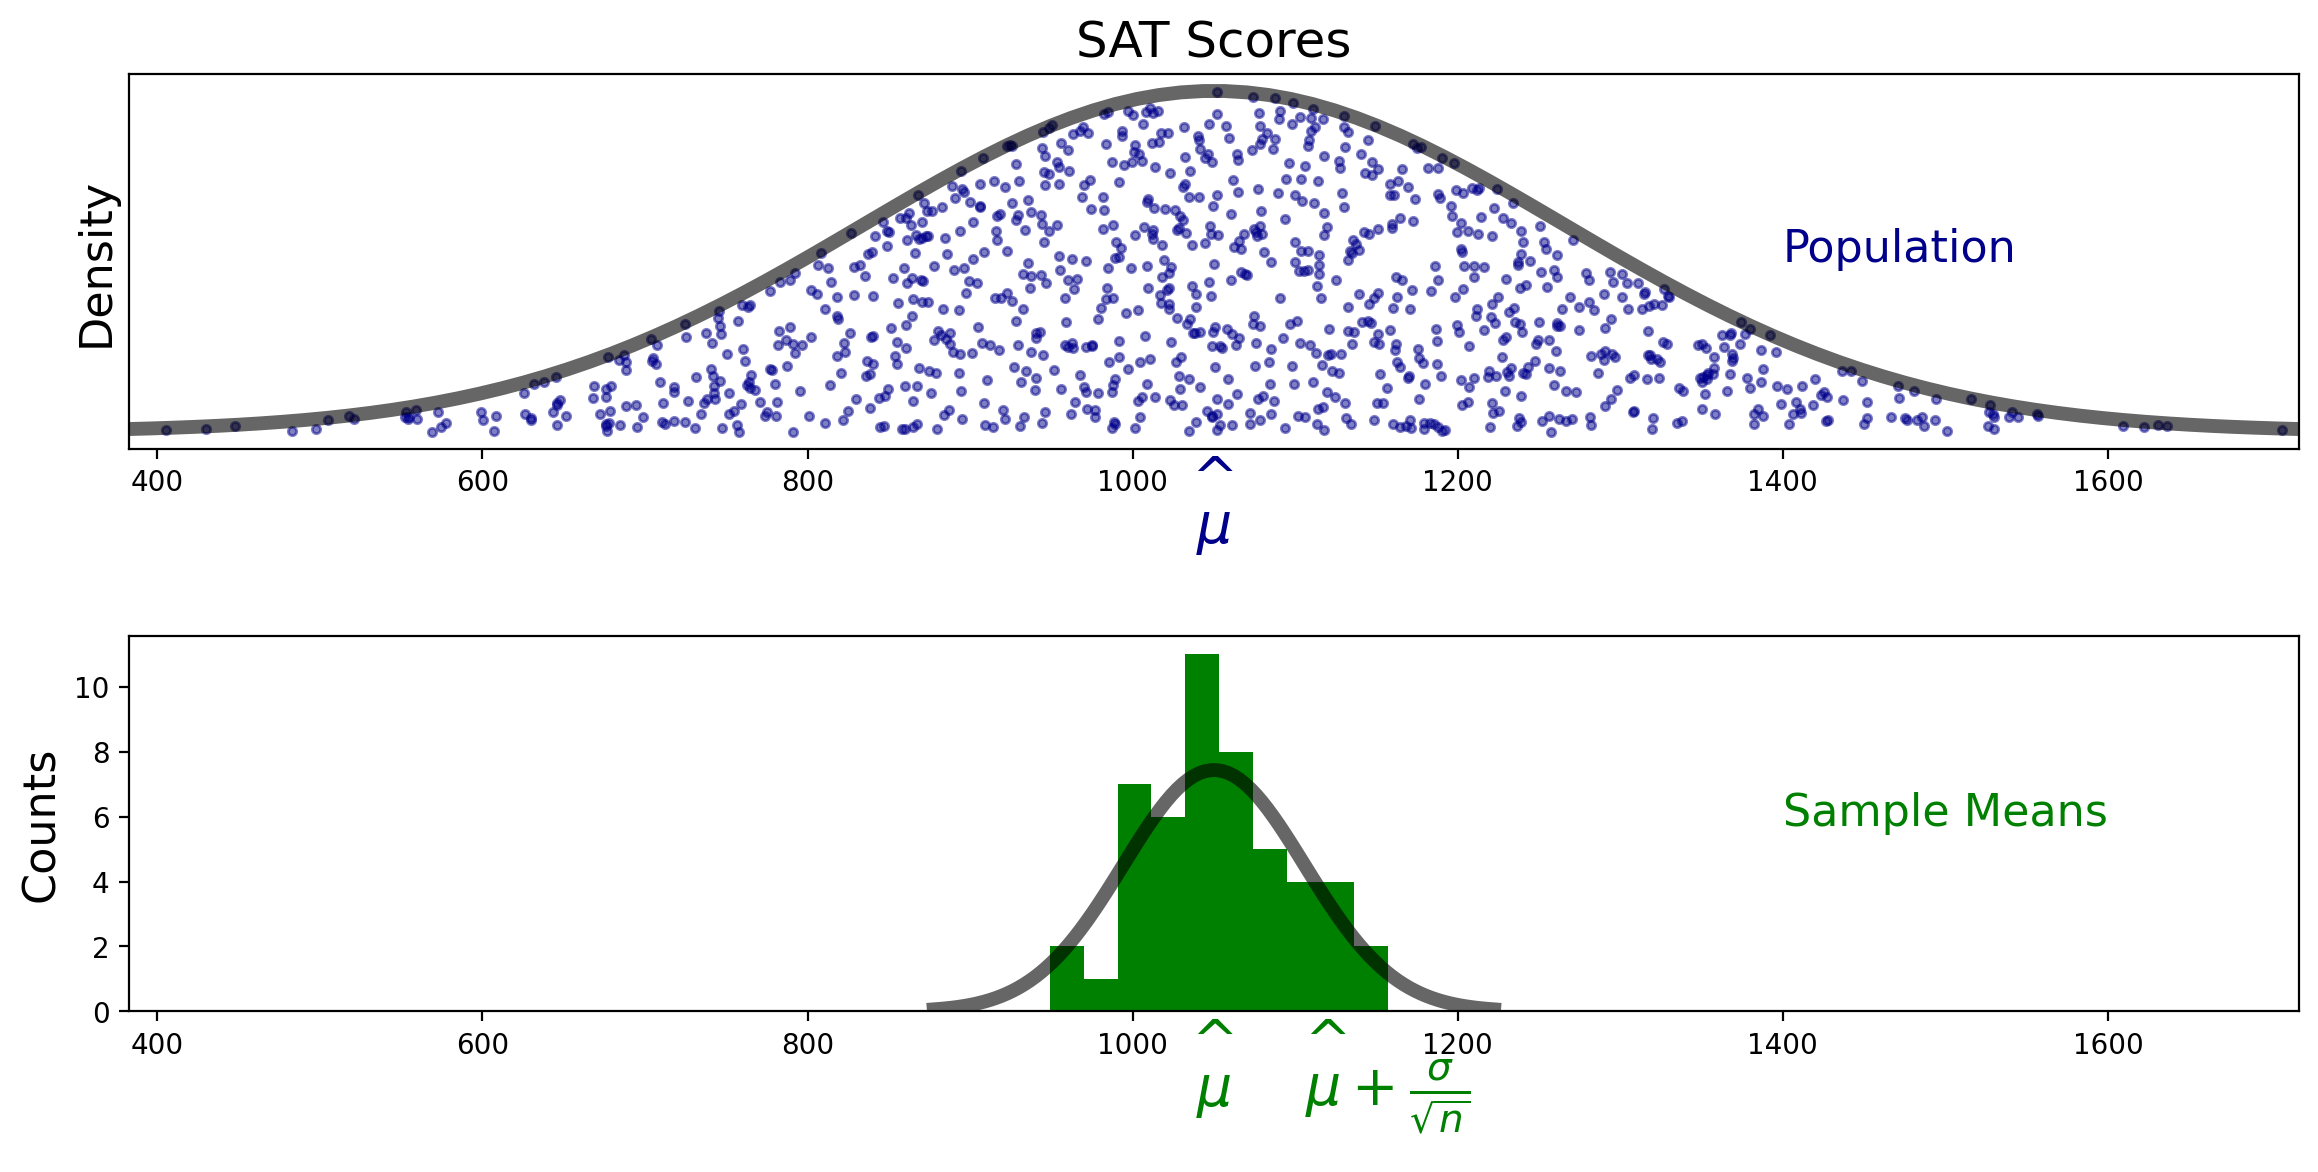

In [4]:
rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
samp_size = 15
std_err = sig / np.sqrt(samp_size)
#
# gaussian curve
fig, (ax1, ax1a, ax2, ax2a) = plt.subplots(4, 1, figsize = (14,7), 
                                           gridspec_kw={'height_ratios': [8, 2, 8, 2]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), 
                norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[0], x[-1])
ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
#
# points under the curve
pop_x = norm.rvs(size = 1000, loc = mu, scale = sig)
pop_y = [uniform.rvs(size = 1, 
                     scale = norm.pdf(x_coord, loc = mu, scale = sig)) for x_coord in pop_x]
ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.set_ylabel('Density', size = 16)
ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
ax1.set_xlim(xmin, xmax)
# xmin, xmax = ax1.get_xlim()
#
# sample
n_samps = 50
samps = [np.mean(norm.rvs(size = samp_size, loc = mu, 
                          scale = sig, random_state = rng)) for i in range(n_samps)]
# use same samp_x and samp_y as above
_, bins, _ = ax2.hist(samps, color = 'g')
bin_width = bins[1] - bins[0]
se_x = np.linspace(norm.ppf(0.001, loc = mu, 
                            scale = std_err), norm.ppf(0.999, loc = mu, scale = std_err), 100)
se_y = n_samps * bin_width * norm.pdf(se_x, loc = mu, scale = std_err)
ax2.plot(se_x, se_y, 'k-', lw = 5, alpha = 0.6)
ax2.set_xlim(xmin, xmax)
#
# ax1.set_title(f'SAT Scores 2022,  $\mu = {mu}, \sigma = {sig}$', size=14)
# 
# sample plot
# turn off y axis entirely
# ax2.yaxis.set_visible(False)
# hide x axis but not its label
# ax2.xaxis.set_major_locator(plt.NullLocator())
# remove the "box" around the plot
#for spine in ax2.spines.values():
#    spine.set_visible(False)
ax2.text(1400, np.sum(ax2.get_ylim())/2 - 0.03, 'Sample Means', size = 16, color = 'g')
ax2.set_ylabel('Counts', size = 16)
#
ax1a.text(mu, np.sum(ax1a.get_ylim())/2, '$\mu$', size = 20, color = 'darkblue', ha = 'center')
# ax1a.text(mu+sig, np.sum(ax1a.get_ylim())/2, '$\mu+\sigma$', 
#size = 20, color = 'darkblue', ha = 'left')
ax1a.text(mu, ax1a.get_ylim()[1], '^', size = 20, color = 'darkblue', ha = 'center')
# ax1a.text(mu+sig, ax1a.get_ylim()[1], '^', size = 20, color = 'darkblue', ha = 'left')
ax1a.yaxis.set_visible(False)
ax1a.xaxis.set_visible(False)
for spine in ax1a.spines.values():
    spine.set_visible(False)
ax1a.set_xlim(xmin, xmax)
#
ax2a.text(mu, np.sum(ax2a.get_ylim())/2, '$\mu$', size = 20, color = 'g', ha = 'center')
ax2a.text(mu+(sig/np.sqrt(samp_size)), np.sum(ax2a.get_ylim())/2, 
          r'$\mu+\frac{\sigma}{\sqrt{n}}$', size = 20, color = 'g', ha = 'left')
ax2a.text(mu, ax2a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'center')
ax2a.text(mu+std_err, ax2a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'left')
ax2a.yaxis.set_visible(False)
ax2a.xaxis.set_visible(False)
for spine in ax2a.spines.values():
    spine.set_visible(False)
ax2a.set_xlim(xmin, xmax)
#
ax1.set_title('SAT Scores', size=18);

We know the distribution of sample means:
    
$$ M \sim \mathcal{N}(\mu, \frac{\sigma^2}{n}). $$

For now, let's assume we know the population standard deviation $\sigma$. 

To find our $f$ value, we want to know:

$$ P(|M - \mu| < f)$$

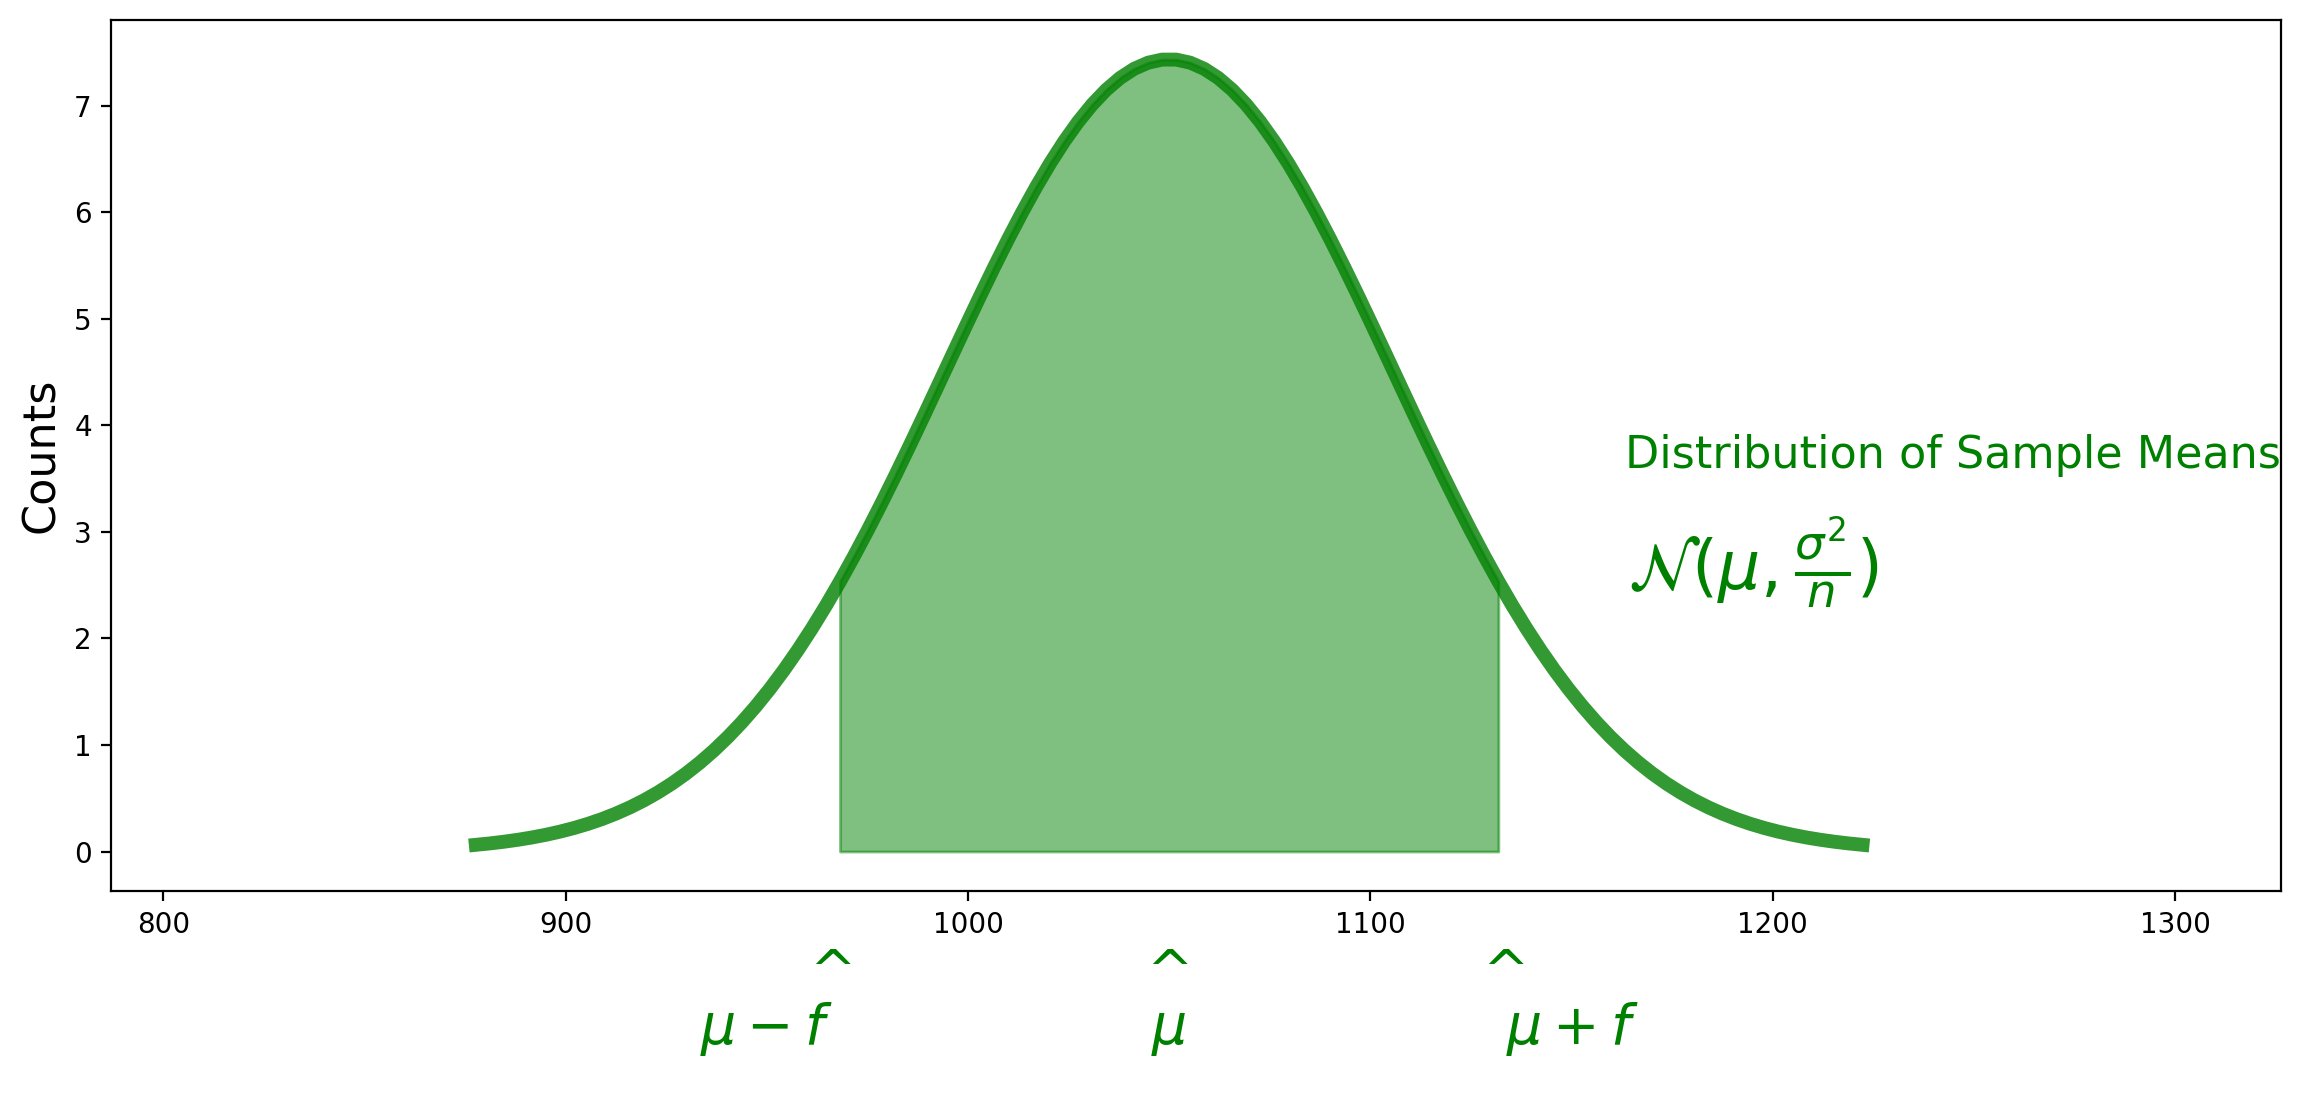

In [5]:
rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
samp_size = 15
std_err = sig / np.sqrt(samp_size)
#
# gaussian curve
fig, (ax2, ax2a) = plt.subplots(2, 1, figsize = (14,7), gridspec_kw={'height_ratios': [8, 1]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[30], x[-30])
#
# sample
n_samps = 50
samps = [np.mean(norm.rvs(size = samp_size, loc = mu, scale = sig, random_state = rng)) for i in range(n_samps)]
# use same samp_x and samp_y as above
#_, bins, _ = ax2.hist(samps, color = 'g')
#bin_width = bins[1] - bins[0]
se_x = np.linspace(norm.ppf(0.001, loc = mu, scale = std_err), norm.ppf(0.999, loc = mu, scale = std_err), 100)
se_y = n_samps * bin_width * norm.pdf(se_x, loc = mu, scale = std_err)
ax2.plot(se_x, se_y, 'g-', lw = 5, alpha = 0.8)
f = 1.5 * std_err
ax2.fill_between(se_x, se_y, 0, where = ((se_x < mu + f) & (se_x > mu - f)), color = 'g', alpha = 0.5)
ax2.set_xlim(xmin, xmax)
#
# ax1.set_title(f'SAT Scores 2022,  $\mu = {mu}, \sigma = {sig}$', size=14)
# 
# sample plot
# turn off y axis entirely
# ax2.yaxis.set_visible(False)
# hide x axis but not its label
# ax2.xaxis.set_major_locator(plt.NullLocator())
# remove the "box" around the plot
#for spine in ax2.spines.values():
#    spine.set_visible(False)
ax2.text(xmax, np.sum(ax2.get_ylim())/2, 'Distribution of Sample Means', 
         size = 16, color = 'g', ha = 'right', va = 'center')
ax2.text(xmax-100, np.sum(ax2.get_ylim())/2 - 1, r'$\mathcal{N}(\mu, \frac{\sigma^2}{n})$', 
         size = 24, color = 'g', ha = 'right', va = 'center')
ax2.set_ylabel('Counts', size = 16)
#
ax2a.text(mu, np.sum(ax2a.get_ylim())/2, '$\mu$', size = 20, color = 'g', ha = 'center')
ax2a.text(mu+f, np.sum(ax2a.get_ylim())/2, 
          r'$\mu+f$', size = 20, color = 'g', ha = 'left')
ax2a.text(mu-f, np.sum(ax2a.get_ylim())/2, 
          r'$\mu-f$', size = 20, color = 'g', ha = 'right')
ax2a.text(mu, ax2a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'center')
ax2a.text(mu+f, ax2a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'center')
ax2a.text(mu-f, ax2a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'center')
ax2a.yaxis.set_visible(False)
ax2a.xaxis.set_visible(False)
for spine in ax2a.spines.values():
    spine.set_visible(False)
ax2a.set_xlim(xmin, xmax)
#
ax1.set_title('SAT Scores', size=18);

Importantly, this probability does not depend on $\mu$!

Because this probability only depends on the __distance__ from $\mu$, in the end all that matters is the standard deviation of $M$.

Recall that the standard deviation of $M$ is called the __standard error__ and it is equal to $\sigma/\sqrt{n}$.

So, still assuming we know $\sigma$, we can calculate the 95% confidence interval for $\mu$.

We are looking for the value $f$ such that

$$P(|M - \mu| < f) \;\;\;\text{when}\;\;\; M \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$$

We can compute this from the formula for the normal distribution, and the  answer is that $f = 1.96 \cdot \sigma/\sqrt{n}$.

This number is called a _z-statistic_.   We write: $z_{0.975} = 1.96.$   We use 0.975 because we want 2.5% of the probability in each of the two tails.

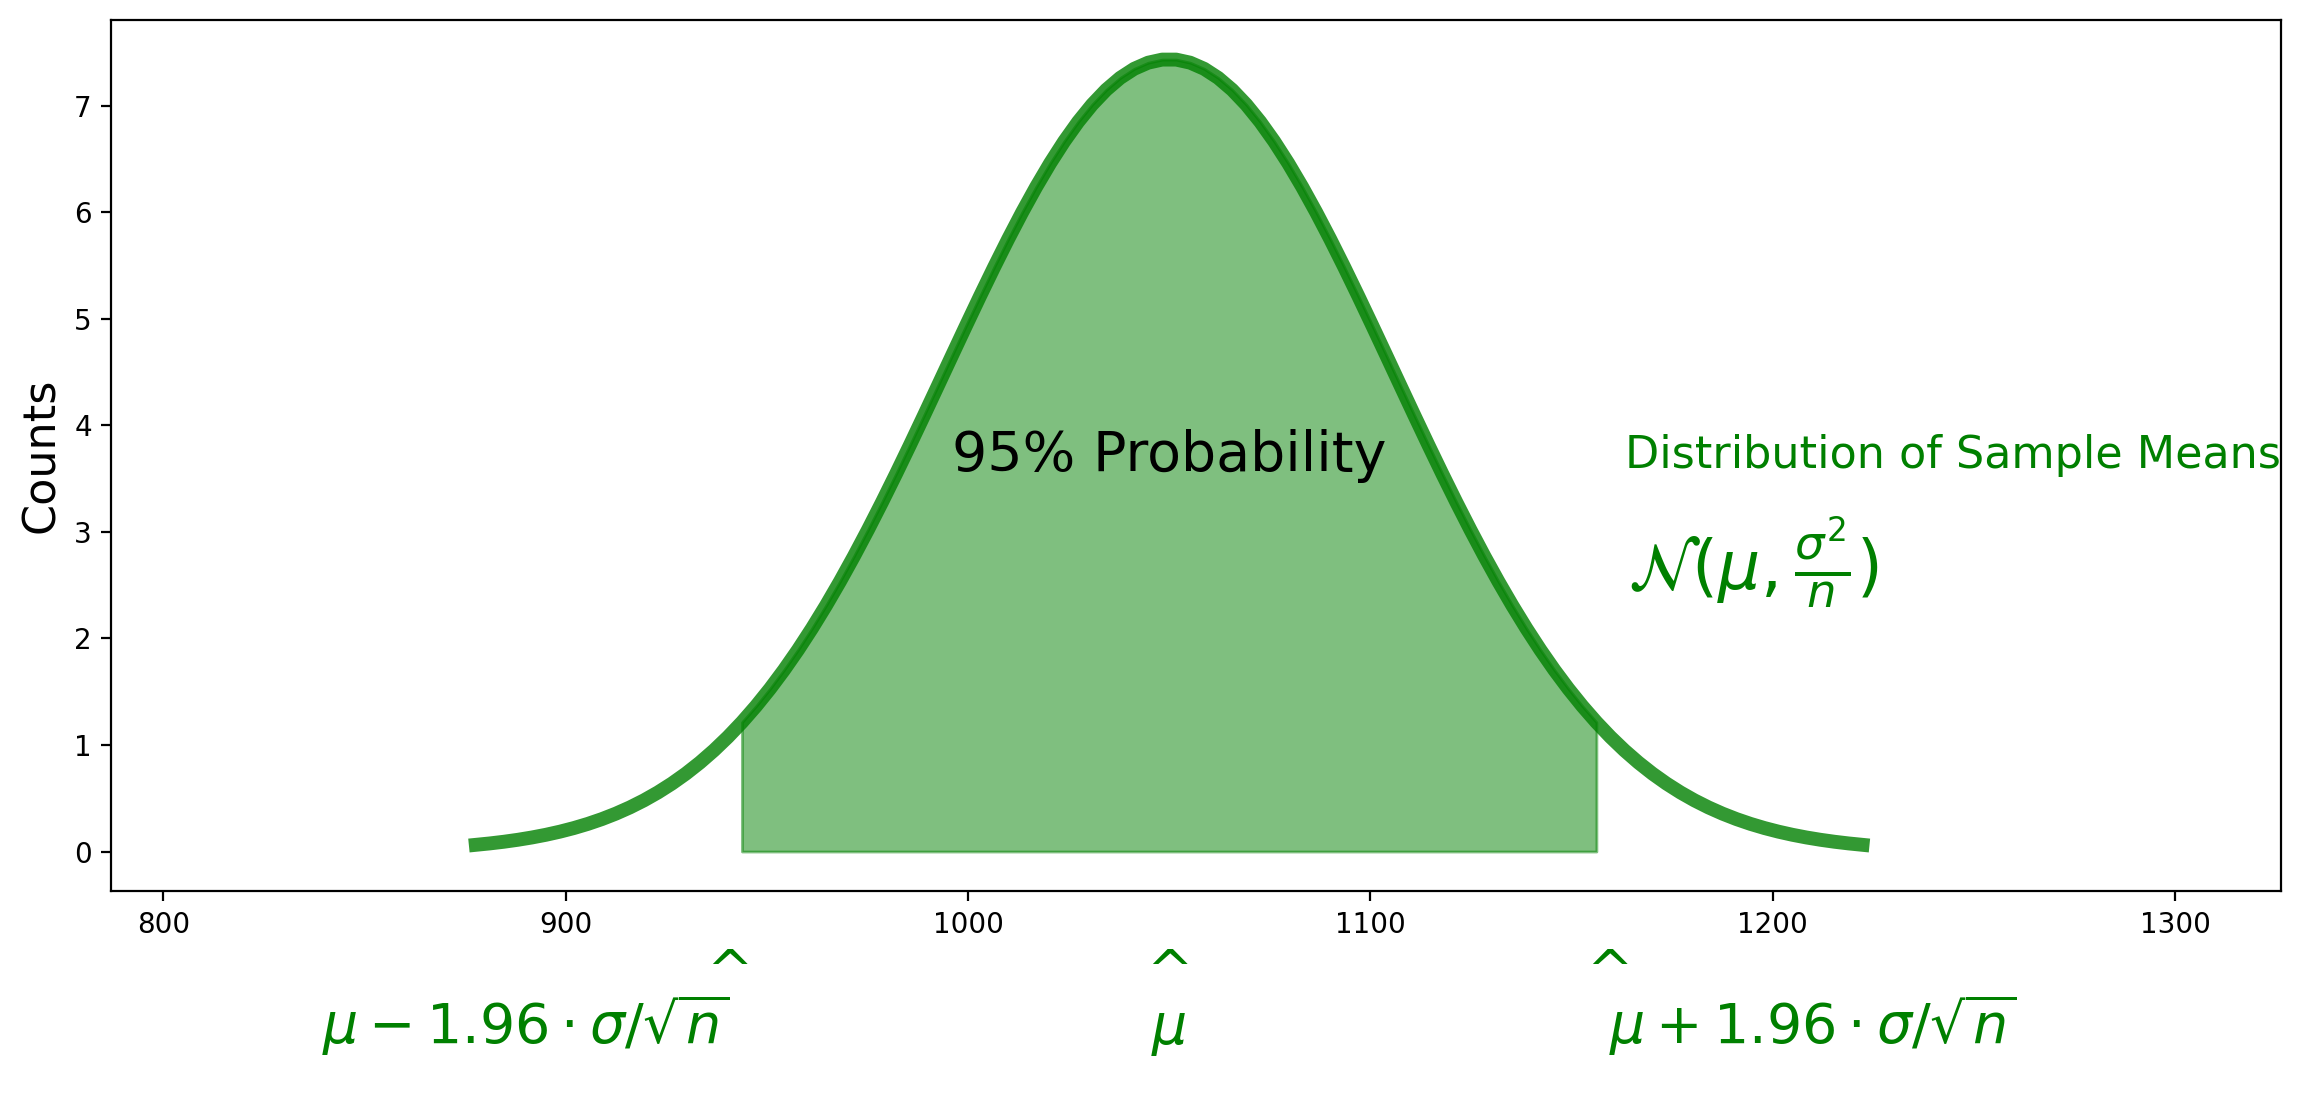

In [6]:
rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
samp_size = 15
std_err = sig / np.sqrt(samp_size)
#
# gaussian curve
fig, (ax2, ax2a) = plt.subplots(2, 1, figsize = (14,7), gridspec_kw={'height_ratios': [8, 1]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[30], x[-30])
#
# sample
n_samps = 50
samps = [np.mean(norm.rvs(size = samp_size, loc = mu, scale = sig, random_state = rng)) for i in range(n_samps)]
# use same samp_x and samp_y as above
#_, bins, _ = ax2.hist(samps, color = 'g')
#bin_width = bins[1] - bins[0]
se_x = np.linspace(norm.ppf(0.001, loc = mu, scale = std_err), norm.ppf(0.999, loc = mu, scale = std_err), 100)
se_y = n_samps * bin_width * norm.pdf(se_x, loc = mu, scale = std_err)
ax2.plot(se_x, se_y, 'g-', lw = 5, alpha = 0.8)
f = 1.96 * std_err
ax2.fill_between(se_x, se_y, 0, where = ((se_x < mu + f) & (se_x > mu - f)), color = 'g', alpha = 0.5)
ax2.set_xlim(xmin, xmax)
#
# ax1.set_title(f'SAT Scores 2022,  $\mu = {mu}, \sigma = {sig}$', size=14)
# 
# sample plot
# turn off y axis entirely
# ax2.yaxis.set_visible(False)
# hide x axis but not its label
# ax2.xaxis.set_major_locator(plt.NullLocator())
# remove the "box" around the plot
#for spine in ax2.spines.values():
#    spine.set_visible(False)
ax2.text(xmax, np.sum(ax2.get_ylim())/2, 'Distribution of Sample Means', 
         size = 16, color = 'g', ha = 'right', va = 'center')
ax2.text(xmax-100, np.sum(ax2.get_ylim())/2 - 1, r'$\mathcal{N}(\mu, \frac{\sigma^2}{n})$', 
         size = 24, color = 'g', ha = 'right', va = 'center')
ax2.text(mu, np.mean(ax2.get_ylim()), '95% Probability', size = 20, color = 'k',
        ha = 'center', va = 'center')
ax2.set_ylabel('Counts', size = 16)
#
ax2a.text(mu, np.sum(ax2a.get_ylim())/2, '$\mu$', size = 20, color = 'g', ha = 'center')
ax2a.text(mu+f, np.sum(ax2a.get_ylim())/2, 
          r'$\mu+1.96 \cdot \sigma/\sqrt{n}$', size = 20, color = 'g', ha = 'left')
ax2a.text(mu-f, np.sum(ax2a.get_ylim())/2, 
          r'$\mu-1.96 \cdot \sigma/\sqrt{n}$', size = 20, color = 'g', ha = 'right')
ax2a.text(mu, ax2a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'center')
ax2a.text(mu+f, ax2a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'center')
ax2a.text(mu-f, ax2a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'center')
ax2a.yaxis.set_visible(False)
ax2a.xaxis.set_visible(False)
for spine in ax2a.spines.values():
    spine.set_visible(False)
ax2a.set_xlim(xmin, xmax)
#
ax1.set_title('SAT Scores', size=18);

So ...

We can now compute the 95% confidence interval for the mean!

Set $f = 1.96 \cdot \sigma / \sqrt{n}$.

Then:

$$
\begin{align*}
P(\mu - f \leq M \leq \mu + f) & > 0.95 & \;\; \text{from the sampling distribution of M}\\
\text{which is equivalent to}\\
P(|M - \mu| < f) & > 0.95 & \;\; \\
\text{which is equivalent to}\\
P(M - f \leq \mu \leq M + f) & > 0.95& \;\; \text{which we can compute from the data!} 
\end{align*}
$$


So the final 95% confidence interval is:
    
$$ (M - 1.96 \,\sigma/\sqrt{n},\;\; M + 1.96 \,\sigma/\sqrt{n}) $$

And we are done!

## Standard Errors

Well, we are not quite done.

We assumed we knew $\sigma$, the population standard deviation.

How will we compute $\sigma$?

The simple answer is that we will estimate $\sigma$ from the data.   That is, for $\sigma$ we will use the sample standard deviation:
    
$$ \sqrt{\frac{1}{n}\sum_i (X_i - \overline{X})^2} $$

However, there is a slight caveat. This is known to be a *biased* estimate of the true standard deviation, so we typically apply a correction to get an *unbiased* estimate:

$$ s = \sqrt{\frac{1}{n-1}\sum_i (X_i - M)^2} $$

The exact reason for using $n-1$ is outside the scope of this class (though some of you may still remember the reasoning from DS120). The intution is that we need a slightly larger variance because our calculation is based on the estimated mean and not the true mean of the population. Because we estimate the mean from the sample, we have lost a "degree of freedom."

Do we introduce error when using $s$ in place of $\sigma$?  

The short answer is that when we have 30 or more samples ($n \geq 30$) then $s$ is an acceptably close estimate of $\sigma$.

When $n \leq 30$ we use a correction factor.   Instead of the $z$ statistc (1.96), we use the $t$ statistic, which you can look up in a table.   The $t$ statistic depends on $n$ -- we say it has $n - 1$ "degrees of freedom."

So you would look up the $t$ statistic for $n-1$ degrees of freedom and confidence level of 95%, and use that number in place of 1.96.

So our final recipe for computing a 95\% confidence interval for $\mu$ from a set of samples $X_i$ that come from a normally distributed population is:

Sample mean:

$$ M = \frac{1}{n}\sum_i X_i $$

Unbiased sample standard deviation:

$$ s = \sqrt{\frac{1}{n-1}\sum_i (X_i - M)^2} $$

Test statistic times standard error:

$$ f_{95} = \left\{\begin{align*}1.96 \cdot \frac{s}{\sqrt{n}} & \;\;\text{if} \;\; n> 30\\ t_{0.975}(n-1) \cdot \frac{s}{\sqrt{n}}& \;\;\text{if} \;\;n \leq 30 \end{align*} \right.$$

and voila:

$$ \text{CI} = (M - f_{95},\;M + f_{95}) $$

or equivalently:

$$ \text{CI} = M \pm f_{95}.$$

### Visualizing Samples and the Confidence Intervals 

Here is an example of two samples from our population, and the associated confidence intervals.

Notice how the size of the confidence interval changes for different sample sizes.

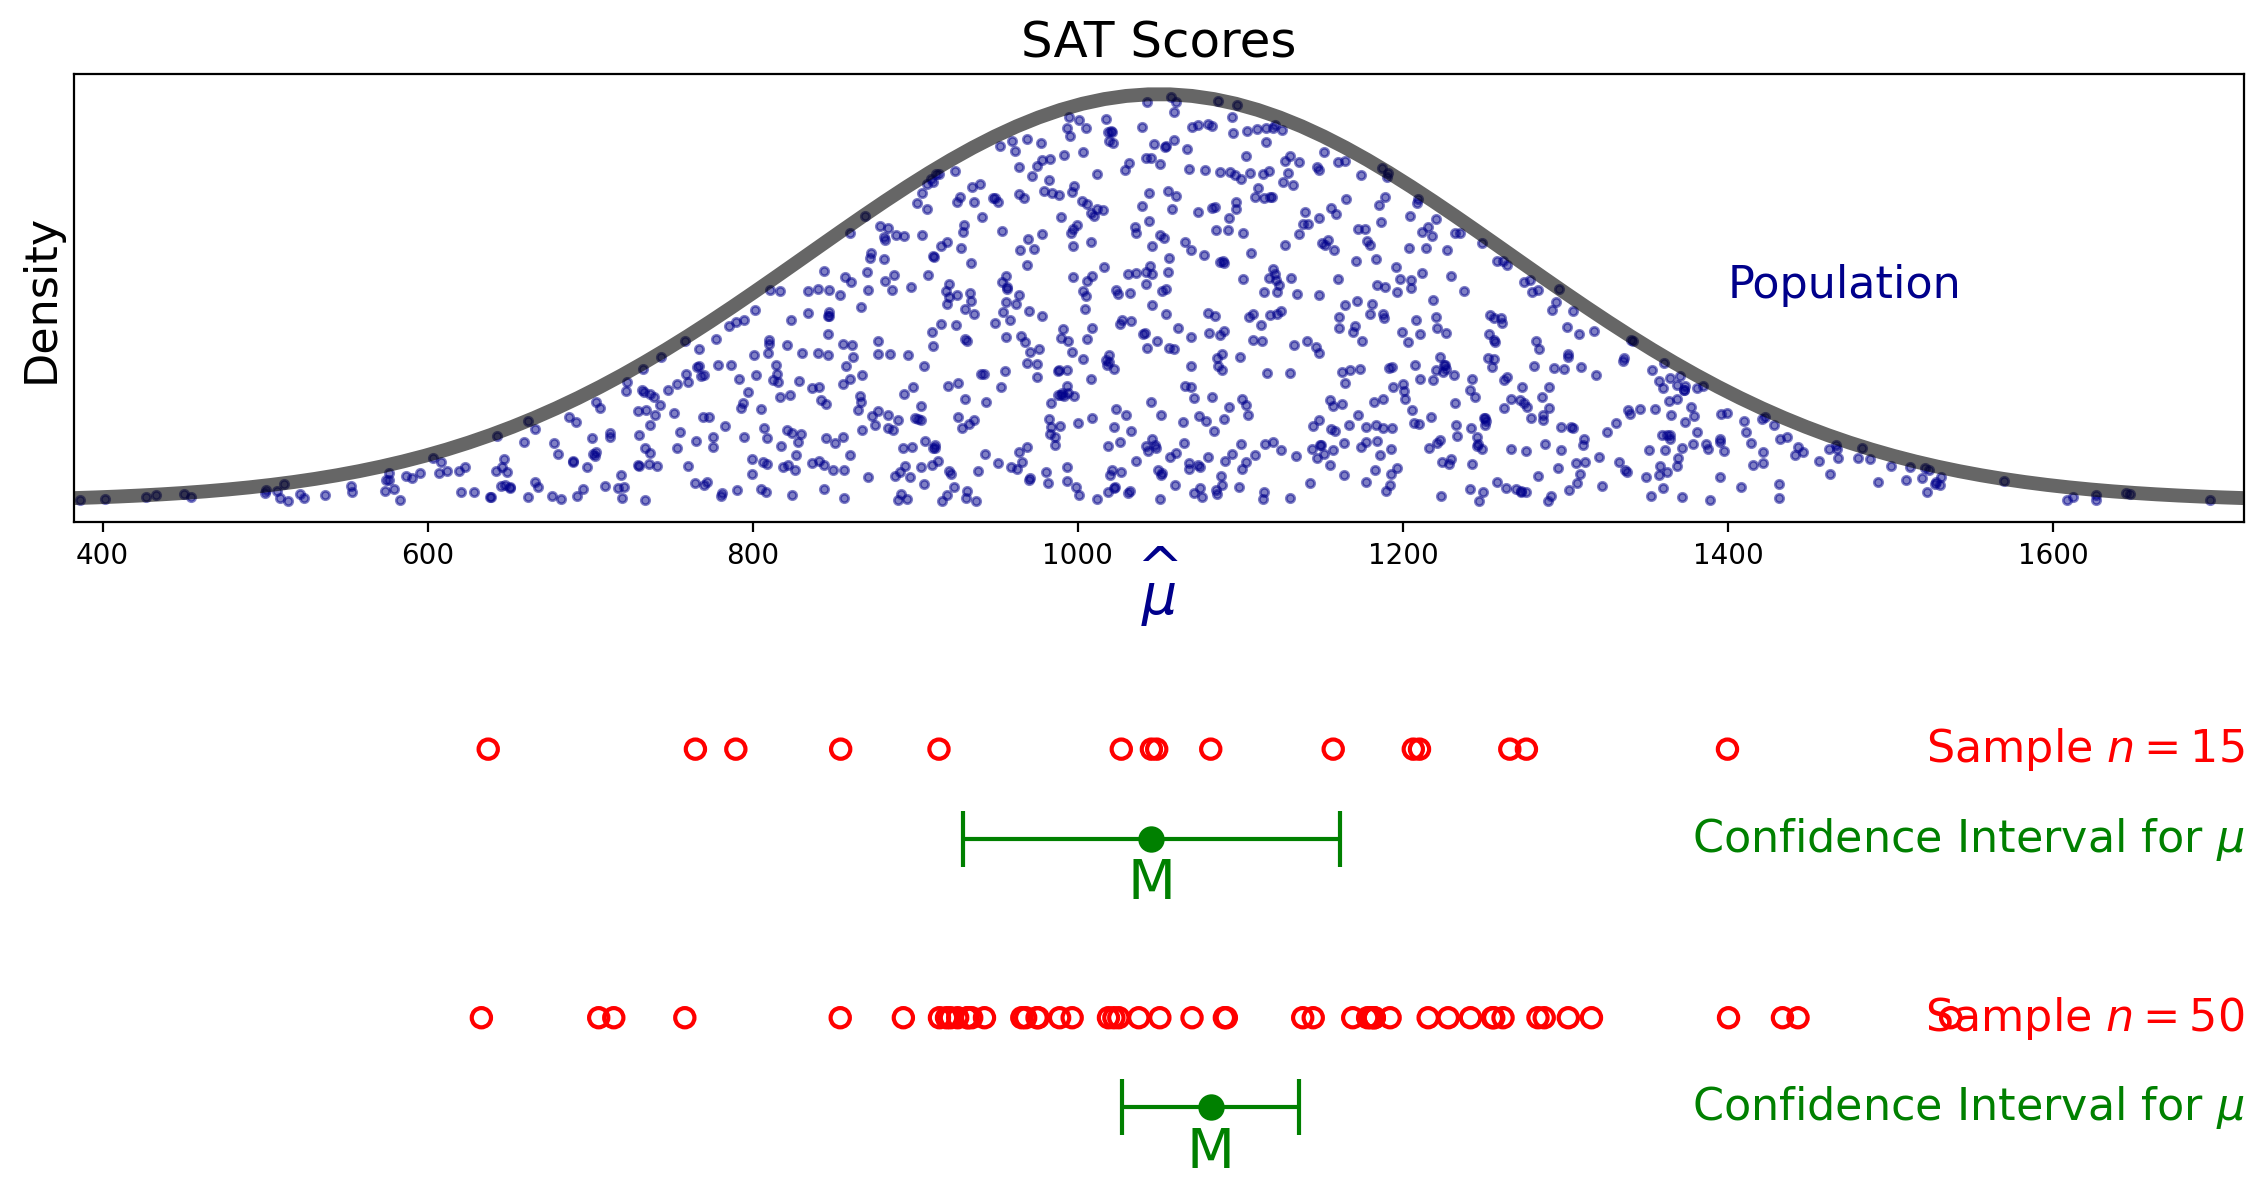

In [7]:
rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
# gaussian curve
fig, (ax1, ax1a, ax2) = plt.subplots(3, 1, figsize = (14,7), gridspec_kw={'height_ratios': [8, 1, 8]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[0], x[-1])
ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
#
# points under the curve
pop_x = norm.rvs(size = 1000, loc = mu, scale = sig)
pop_y = [uniform.rvs(size = 1, scale = norm.pdf(x_coord, loc = mu, scale = sig)) for x_coord in pop_x]
ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.set_ylabel('Density', size = 16)
ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
ax1.set_xlim(xmin, xmax)
# xmin, xmax = ax1.get_xlim()
#
# sample
#
samp_size = 15
t_stat = stats.t.ppf(1-0.025, samp_size - 1)
samp_x = norm.rvs(size = samp_size, loc = mu, scale = sig, random_state = rng)
samp_y = [2.75 for x in samp_x]
M = np.mean(samp_x)
std_err = np.std(samp_x) / np.sqrt(samp_size)
#
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(0.5, 3)
#
ax2.scatter(samp_x, samp_y, marker = 'o', facecolors='none', edgecolors='red', linewidths = 1.5, s = 48)
ax2.text(xmax, 2.75, 'Sample $n = 15$', size = 16, color = 'red', va = 'center', ha = 'right')
ax2.scatter(M, 2.25, marker = 'o', facecolors = 'g', edgecolors='g', linewidths = 1.5, s = 64)
ax2.errorbar(M, 2.25, xerr = t_stat * std_err, fmt = 'None', ecolor = 'g', elinewidth = 1.5, capsize = 10, capthick = 1.5)
ax2.text(xmax, 2.25, 'Confidence Interval for $\mu$', size = 16, color = 'g', va = 'center', ha = 'right')
ax2.text(M, 2, 'M', size = 20, color = 'g', ha = 'center', va = 'center')
#
samp_size = 50
samp_x = norm.rvs(size = samp_size, loc = mu, scale = sig, random_state = rng)
samp_y = [1.25 for x in samp_x]
M = np.mean(samp_x)
std_err = np.std(samp_x) / np.sqrt(samp_size)
#
ax2.scatter(samp_x, samp_y, marker = 'o', facecolors='none', edgecolors='red', linewidths = 1.5, s = 48)
ax2.text(xmax, 1.25, 'Sample $n = 50$', size = 16, color = 'red', va = 'center', ha = 'right')
ax2.scatter(M, 0.75, marker = 'o', facecolors = 'g', edgecolors='g', linewidths = 1.5, s = 64)
ax2.errorbar(M, 0.75, xerr = 1.96 * std_err, fmt = 'None', ecolor = 'g', elinewidth = 1.5, capsize = 10, capthick = 1.5)
ax2.text(xmax, 0.75, 'Confidence Interval for $\mu$', size = 16, color = 'g', va = 'center', ha = 'right')
ax2.text(M, 0.5, 'M', size = 20, color = 'g', ha = 'center', va = 'center')

#ax2.text(M+f, 1.75, r'$M + f$', size = 20, color = 'g', ha = 'left', va = 'center')
#ax2.text(M-f, 1.75, r'$M - f$', size = 20, color = 'g', ha = 'right', va = 'center');
ax2.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
#
ax1a.text(mu, np.sum(ax1a.get_ylim())/2, '$\mu$', size = 20, color = 'darkblue', ha = 'center')
# ax1a.text(mu+sig, np.sum(ax1a.get_ylim())/2, '$\mu+\sigma$', size = 20, color = 'darkblue', ha = 'left')
ax1a.text(mu, ax1a.get_ylim()[1], '^', size = 20, color = 'darkblue', ha = 'center')
# ax1a.text(mu+sig, ax1a.get_ylim()[1], '^', size = 20, color = 'darkblue', ha = 'left')
ax1a.yaxis.set_visible(False)
ax1a.xaxis.set_visible(False)
for spine in ax1a.spines.values():
    spine.set_visible(False)
ax1a.set_xlim(xmin, xmax)
#
ax1.set_title('SAT Scores', size=18);



## When the Population is not Normal

<!--- https://online.stat.psu.edu/stat415/lesson/2/2.6 --->

<!--- Also look at this https://math.mit.edu/~dav/05.dir/class23-prep.pdf for handling Bernoulli.  Also return to it in Bayesian section --->

````{margin}
```{note}
For more details on handling non-normal data, see the notes [here.](https://math.mit.edu/~dav/05.dir/class23-prep.pdf)  The example comes from there.
```
````

Now, we have so far been assuming that the population is normally distributed.   This may seem like a very limiting assumption.

However, it turns out that in the majority of cases, __the distribution of the population does not matter too much.__

Here is why.

Recall that our sample statistic is

$$ M = \frac{1}{n}\sum_i X_i. $$

Now recall that the Central Limit Theorem tells us that for $n$ large enough, the sum of $n$ samples from __any__ distribution is approximately normally distributed.

(A technical limitation: the underlying distribution must have finite variance.  Most distributions you encounter in practice will have this property.)

How large should $n$ be for us to be able to rely on the Central Limit Theorem?

The long answer is that it depends on the population distribution.   A highly skewed distribution, or one with a large ratio of standard deviation to mean, will require larger sample sizes.

However, for most practical purposes, a sample size of $n = 100$ is large enough to allow use of the normal distribution to describe the distribution of the sample mean.

<center>

<img src="images/sampling_distribution_original.png" width="700px">

</center>


__Example.__  A pollster asks 196 people if they prefer candidate A to candidate B and finds that 120 prefer A and 76 prefer B. Find the 95% conservative normal confidence interval for 
$p$, the proportion of the population that prefers A.

In [8]:
M = 120/196
s = np.sqrt((1/195) * ((120 * (1 - M) * (1 - M)) + (76 * M * M)))
f = 1.96 * (s / np.sqrt(196))

__Solution.__

The sample mean is 

$$M = \frac{120}{196} = 0.612.$$

The sample standard deviation is

$$ s = \sqrt{\frac{1}{n-1}\sum_i (X_i - M)^2} $$

Since there are only two values of $X_i$, 1 and 0, we can see that

$$ s = \sqrt{\frac{1}{n-1} \left( 120\cdot(1 - M)^2 + 76 \cdot (0 - M)^2\right)} = .488 $$

So we conclude that the 95% confidence interval of support for candidate A is 

$$ 0.612 \pm 1.96 \cdot \frac{0.488}{\sqrt{196}} = 0.612 \pm 0.068. $$

In other words, 95% CI = [.544, .680].

Note that there are some simplifications to the above that we can make.

The standard deviation of the Binomial distribution is $\sigma = \sqrt{p(1-p)}$.  We notice that this is always less than or equal to 1/2.

So we could generate a __conservative__ estimate of the confidence interval by using 1/2 in place of $s$.

And let's also use the approximation 2 in place of 1.96.

Then the 95% confidence interval becomes:

$$ 0.612 \pm \frac{1}{\sqrt{196}} = 0.612 \pm 0.071. $$

Notice that this confidence interval is slightly wider than the more precise one that uses the actual sample standard deviation.

However, it is __much simpler__ to compute (and remember):

The 95% confidence interval for the Bernoulli is approximately $M \pm \frac{1}{\sqrt{n}}$.

This leads to a simple rule for interpreting, eg polling data.

Political polls are often reported as a value with a margin-of-error. For example you might hear
52% favor candidate A with a margin-of-error of $\pm$5%.

The actual precise meaning of this is
if $p$ is the proportion of the population that supports A then the point estimate
for $p$ is 52% and the 95% confidence interval is 52% $\pm$ 5%.

And you can estimate from this statement that the poll involved about 

$$ \frac{1}{\sqrt{n}} = 0.05$$ 

respondents, ie, $n \approx 400$ respondents.

Notice that reporters of polls in the news do not mention the 95% confidence. You just have to
know that that’s what pollsters do.

## Interpreting Confidence Intervals

What does the 95% confidence interval mean?   How can we interpret it?

The simple answer is that about 95% of the time, the confidence interval you calculate using our recipe will contain the mean.

In other words, imagine you performed the sampling process 100 times, and each time you computed a confidence interval.  Then you'd expect about 95 of those confidence intervals to include the mean.

Here is an example of that process.  Here we've repeated the sampling process 20 times.

Note how the confidence intervals dance around, and how their sizes vary.

Note that not every confidence interval contains the mean (the orange ones don't).

However, roughly 95% of the confidence intervals will contain the mean.

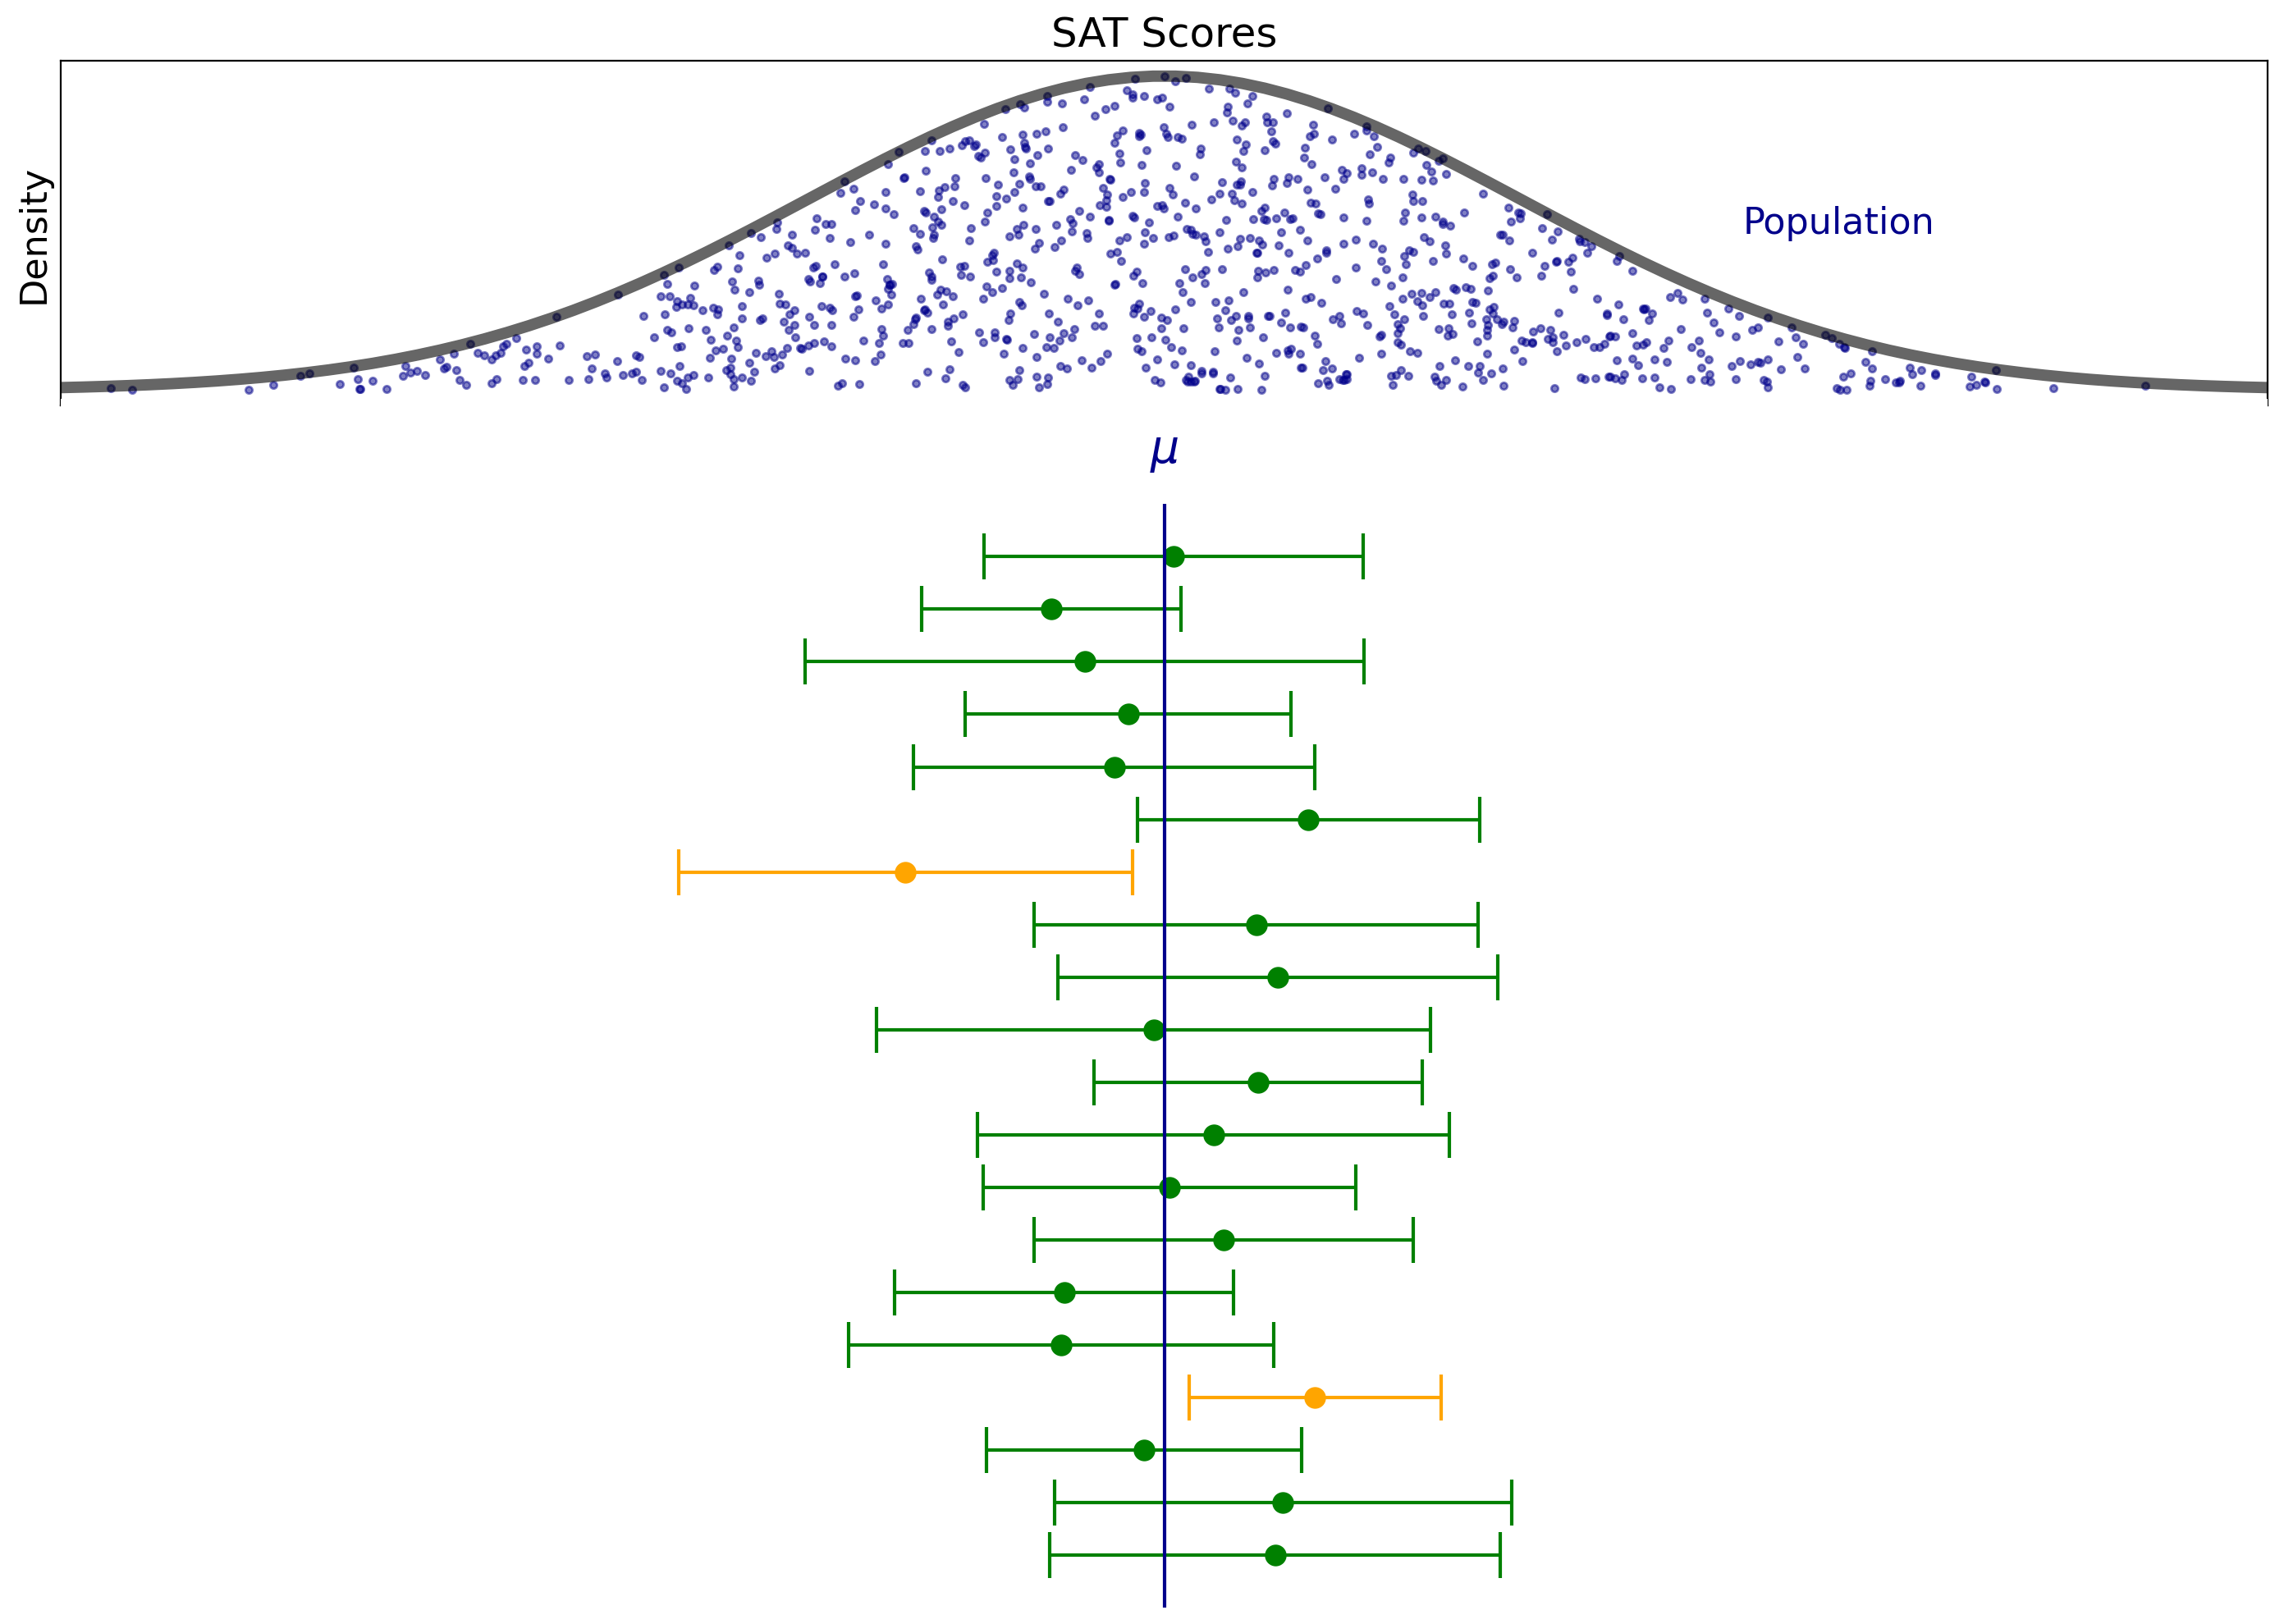

In [9]:
rng = default_rng(13)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
# gaussian curve
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14,10), gridspec_kw={'height_ratios': [2, 7]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[0], x[-1])
ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
#
# points under the curve
pop_x = norm.rvs(size = 1000, loc = mu, scale = sig)
pop_y = [uniform.rvs(size = 1, scale = norm.pdf(x_coord, loc = mu, scale = sig)) for x_coord in pop_x]
ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.set_ylabel('Density', size = 16)
ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
ax1.set_xlim(xmin, xmax)
# xmin, xmax = ax1.get_xlim()
#
# samples
#
def contains(mu, M, f):
    return (M < (mu + f) and M > (mu - f))

samp_size = 15
t_stat = stats.t.ppf(1-0.025, samp_size - 1)
for samp in range (20):
    samp_x = norm.rvs(size = samp_size, loc = mu, scale = sig, random_state = rng)
    M = np.mean(samp_x)
    std_err = np.std(samp_x) / np.sqrt(samp_size)
    if contains(mu, M, t_stat * std_err):
        col = 'g'
    else:
        col = 'orange'
    #
    ax2.scatter(M, samp, marker = 'o', facecolors = col, edgecolors=col, linewidths = 1.5, s = 64)
    ax2.errorbar(M, samp, xerr = t_stat * std_err, fmt = 'None', ecolor = col, elinewidth = 1.5, capsize = 10, capthick = 1.5)
#
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-1, 22)
#
ax2.vlines(mu, -1, 20, colors = 'darkblue')
ax2.text(mu, 21, r'$\mu$', size = 20, color = 'darkblue', ha = 'center', va = 'center')
#ax2.text(M+f, 1.75, r'$M + f$', size = 20, color = 'g', ha = 'left', va = 'center')
#ax2.text(M-f, 1.75, r'$M - f$', size = 20, color = 'g', ha = 'right', va = 'center');
ax2.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
#
ax1.set_title('SAT Scores', size=18)
plt.tight_layout(h_pad = -2);



There is a small technical point here: any time you compute a specific confidence interval, it either __does__ or __does not__ include the mean.

So it is not correct to say that "this confidence interval includes the mean with probability 0.95".  

But it quite correct to use the level of 0.95 as a measure of subjective confidence, in which the 0.95 probability is used to reflect our state of knowledge (ie, from a Bayesian standpoint), and to say "I am 95% confident that this interval contains the mean."

## Reporting and Using Confidence Intervals

What is the role of confidence intervals in summarizing data?

The simple answer is __confidence intervals are crucial.__

You cannot communicate with clarity without reporting confidence intervals.

__Any time__ you are reporting a statistic derived from a sample, such as the sample mean, you should report the associated confidence intervals.


Confidence intervals combine information on location and precision.  

They tell you (or your reader) both __how large__ is the quantity (location) and __how much information__ the estimate provides.

There are standard ways for doing this.

In text, it is standard to write in this format:

$M = 30.5 \text{cm, 95\% CI } [18.0, 45.0]$

In a table, you should use this format:

|   | height | 95% CI |
|---|---|---|
| men, n = 25 | 69.0 in | [68.1, 69.9]|
| women, n = 23 | 61.1 in | [60.3, 62.0] |

In figures, it is standard to use error bars as we have in this lecture. 

And a final point: throughout this lecture we've computed 95% confidence intervals.   Some statisticians will suggest that you may want to use a different confidence level depending on the setting.

If your results will be used to make life-or-death decisions, perhaps a 99% or even a 99.9% confidence interval should be used.  

On the other hand, if we are not so concerned about an occasional miss, perhaps a 90% or 80% confidence interval should be used. 

These are reasonable considerations, but in general work it's probably best to stick with 95% confidence intervals for consistency and ease of interpretation.